In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import date
from dateutil.relativedelta import relativedelta

In [2]:
#import rig count data, source: EIA
rigs = pd.read_excel('North America Rotary Rig Count (Jan 2000 - 6_5_2020).xlsx', 
                     sheet_name = 'US Oil & Gas Split', 
                     skiprows = 6)

wti = pd.read_excel('Wti Data.xlsx')

In [3]:
rigs = rigs[rigs.Date >= '2000-04-01'].reset_index(drop=True)
rigs

,Date,Oil,Gas,Misc,Total,% Oil,% Gas
0,2000-04-01,173,601,1,775,0.233375,0.765370
1,2000-04-08,186,610,1,797,0.233375,0.765370
2,2000-04-20,206,610,1,817,0.252142,0.746634
3,2000-04-28,199,598,1,798,0.249373,0.749373
4,2000-05-05,201,632,0,833,0.241297,0.758703
...,...,...,...,...,...,...,...
1048,2020-05-08,292,80,2,374,0.780749,0.213904
1049,2020-05-15,258,79,2,339,0.761062,0.233038
1050,2020-05-22,237,79,2,318,0.745283,0.248428
1051,2020-05-29,222,77,2,301,0.737542,0.255814


In [49]:
#an example of how we will adjust the rig date
three_months = dt(2000, 4, 8) + relativedelta(months = -3)
three_months

datetime.datetime(2000, 1, 8, 0, 0)

In [111]:
rigs['adj_date'] = rigs['Date'].map(lambda x: x - relativedelta(months = 3))
rigs

,Date,Oil,Gas,Misc,Total,% Oil,% Gas,adj_date
0,2000-04-01,173,601,1,775,0.233375,0.765370,2000-01-01
1,2000-04-08,186,610,1,797,0.233375,0.765370,2000-01-08
2,2000-04-20,206,610,1,817,0.252142,0.746634,2000-01-20
3,2000-04-28,199,598,1,798,0.249373,0.749373,2000-01-28
4,2000-05-05,201,632,0,833,0.241297,0.758703,2000-02-05
...,...,...,...,...,...,...,...,...
1048,2020-05-08,292,80,2,374,0.780749,0.213904,2020-02-08
1049,2020-05-15,258,79,2,339,0.761062,0.233038,2020-02-15
1050,2020-05-22,237,79,2,318,0.745283,0.248428,2020-02-22
1051,2020-05-29,222,77,2,301,0.737542,0.255814,2020-02-29


In [205]:
#import price date, source: EIA
wti = wti[wti.Date >= '2000-04-01'].reset_index(drop = True)
wti

,Date,Open,High,Low,Close,Adj Close,Volume,drift_param,vol_param
0,2000-04-03,26.950001,27.120001,26.350000,26.450001,26.450001,75234,-0.016729,0.001008
1,2000-04-04,26.000000,26.100000,25.299999,25.400000,25.400000,31459,-0.039698,0.000077
2,2000-04-05,25.500000,26.450001,25.129999,25.850000,25.850000,69048,0.017717,0.004382
3,2000-04-06,25.950001,26.070000,25.530001,25.700001,25.700001,79626,-0.005803,0.001821
4,2000-04-07,25.299999,25.780001,24.850000,24.900000,24.900000,48987,-0.031128,0.000301
...,...,...,...,...,...,...,...,...,...
5048,2020-05-31,35.270000,35.419998,35.240002,35.299999,35.299999,186579,-0.000566,0.002295
5049,2020-06-01,35.310001,35.750000,34.270000,35.459999,35.459999,172722029,0.004533,0.002810
5050,2020-06-02,35.700001,37.380001,35.549999,37.259998,37.259998,138842394,0.050761,0.009848
5051,2020-06-03,37.549999,38.180000,35.880001,36.910000,36.910000,215830430,-0.009393,0.001528


In [206]:
#create date dataframe to merge to, this ensures we will match on a weekly basis
idx = pd.DataFrame(pd.date_range('2000-01-08', '2020-06-04', freq = 'W'), columns = ['Date'])
idx

,Date
0,2000-01-09
1,2000-01-16
2,2000-01-23
3,2000-01-30
4,2000-02-06
...,...
1060,2020-05-03
1061,2020-05-10
1062,2020-05-17
1063,2020-05-24


In [207]:
#data type matplotlib will be plotting
idx.Date.iloc[0]

Timestamp('2000-01-09 00:00:00')

In [208]:
#merge rig count data with concurent wti data
idy = idx.merge(rigs, left_on = 'Date', 
                right_on = 'Date', 
                how = 'outer').merge(wti, left_on = 'Date', 
                                     right_on = 'Date', 
                                     how = 'inner')
idy = idy.sort_values(by= ["Date"])

In [209]:
idy

,Date,Oil,Gas,Misc,Total,% Oil,% Gas,adj_date,Open,High,Low,Close,Adj Close,Volume,drift_param,vol_param
18,2000-04-20,206.0,610.0,1.0,817.0,0.252142,0.746634,2000-01-20,25.750000,25.980000,25.480000,25.879999,25.879999,102207,-0.048529,2.766715e-09
19,2000-04-28,199.0,598.0,1.0,798.0,0.249373,0.749373,2000-01-28,25.650000,26.100000,25.500000,25.799999,25.799999,58659,0.015748,4.124836e-03
20,2000-05-05,201.0,632.0,0.0,833.0,0.241297,0.758703,2000-02-05,26.799999,27.400000,26.760000,27.350000,27.350000,50930,0.013714,3.867691e-03
21,2000-05-12,196.0,634.0,0.0,830.0,0.236145,0.763855,2000-02-12,29.450001,30.000000,28.850000,29.620001,29.620001,83212,0.017869,4.401832e-03
22,2000-05-19,198.0,651.0,0.0,849.0,0.233216,0.766784,2000-02-19,30.200001,30.200001,29.350000,30.000000,30.000000,49335,-0.010880,1.413501e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2020-05-17,NaN,NaN,NaN,NaN,NaN,NaN,NaT,29.530001,30.320000,29.530001,30.270000,30.270000,45586,0.020911,4.814628e-03
1055,2020-05-22,237.0,79.0,2.0,318.0,0.745283,0.248428,2020-02-22,31.840000,33.639999,31.320000,33.560001,33.560001,234556276,-0.009737,1.500752e-03
16,2020-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaT,33.060001,33.090000,32.790001,33.000000,33.000000,460067,-0.016687,1.010623e-03
1056,2020-05-29,222.0,77.0,2.0,301.0,0.737542,0.255814,2020-02-29,33.150002,35.770000,32.360001,35.320000,35.320000,167705030,0.050878,9.871328e-03


In [210]:
#this merge adjusts the rig date back 3 months to account for lag
idx = idx.merge(rigs, left_on = 'Date', 
                right_on = 'adj_date', 
                how = 'outer').merge(wti, left_on = 'Date_y', 
                                     right_on = 'Date', 
                                     how = 'inner')
idx = idx.sort_values(by= ["Date"])

In [211]:
idx = idx.rename(columns = {'Date_x': 'adj_date', 'Date_y': 'Date'})
idx

,adj_date,Date,Oil,Gas,Misc,Total,% Oil,% Gas,adj_date,Date,Open,High,Low,Close,Adj Close,Volume,drift_param,vol_param
60,NaT,2000-04-20,206.0,610.0,1.0,817.0,0.252142,0.746634,2000-01-20,2000-04-20,25.750000,25.980000,25.480000,25.879999,25.879999,102207,-0.048529,2.766715e-09
61,NaT,2000-04-28,199.0,598.0,1.0,798.0,0.249373,0.749373,2000-01-28,2000-04-28,25.650000,26.100000,25.500000,25.799999,25.799999,58659,0.015748,4.124836e-03
62,NaT,2000-05-05,201.0,632.0,0.0,833.0,0.241297,0.758703,2000-02-05,2000-05-05,26.799999,27.400000,26.760000,27.350000,27.350000,50930,0.013714,3.867691e-03
63,NaT,2000-05-12,196.0,634.0,0.0,830.0,0.236145,0.763855,2000-02-12,2000-05-12,29.450001,30.000000,28.850000,29.620001,29.620001,83212,0.017869,4.401832e-03
64,NaT,2000-05-19,198.0,651.0,0.0,849.0,0.233216,0.766784,2000-02-19,2000-05-19,30.200001,30.200001,29.350000,30.000000,30.000000,49335,-0.010880,1.413501e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,NaT,2020-05-01,325.0,81.0,2.0,408.0,0.796569,0.198529,2020-02-01,2020-05-01,19.040001,20.480000,18.070000,18.840000,18.840000,368386,0.250996,8.968399e-02
1035,NaT,2020-05-08,292.0,80.0,2.0,374.0,0.780749,0.213904,2020-02-08,2020-05-08,23.879999,24.990000,23.340000,24.629999,24.629999,77581336,0.044086,8.567965e-03
1036,NaT,2020-05-15,258.0,79.0,2.0,339.0,0.761062,0.233038,2020-02-15,2020-05-15,27.840000,29.920000,27.690001,29.650000,29.650000,32483447,0.069239,1.385705e-02
1037,NaT,2020-05-22,237.0,79.0,2.0,318.0,0.745283,0.248428,2020-02-22,2020-05-22,31.840000,33.639999,31.320000,33.560001,33.560001,234556276,-0.009737,1.500752e-03


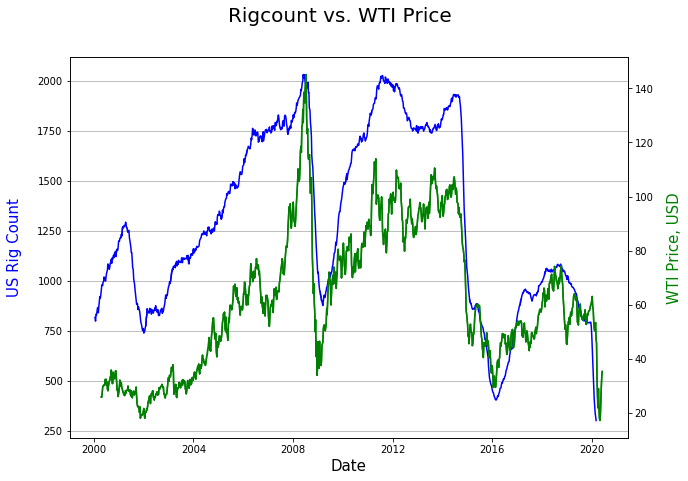

In [268]:
#plot adjusted rig count vs price
fig, ax = plt.subplots(figsize = (10, 7))

ax1 = ax.twinx()
ax.plot(idx['adj_date'], idx['Total'], color = 'b')
ax1.plot(idx['Date'], idx['Close'], color = 'g')

#zoom in on the area of interest 
#ax.set_xlim(pd.Timestamp('2010-01-01'), )
#ax.set_ylim(0, 2000)

ax.set_xlabel('Date', size = 15)
ax.set_ylabel('US Rig Count', color='b', rotation = 90, size = 15)
ax.yaxis.set_label_coords(-0.085, 0.5)
ax.grid(axis ='y')

ax1.set_ylabel('WTI Price, USD', color='g', size = 15)
ax1.yaxis.set_label_coords(1.07, 0.5)

fig.suptitle('Rigcount vs. WTI Price', size = 20)
plt.show()

In [269]:
# #plot concurrent rig count vs price 
# fig, ax = plt.subplots(figsize = (10, 7))

# ax1 = ax.twinx()
# ax.plot(idy['Date'], idy['Total'])
# ax1.plot(idy['Date'], idy['Close'], color = 'r')
# plt.show()